In [1]:
import sys
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
sys.path.append('/micrograd/micrograd')

from micrograd.micrograd.engine import Value
import numpy as np


In [2]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [3]:
from math import sin, cos, tanh

def funf(a, b, c):
  return -a**3 + sin(3*b) - 1.0/c + b**2.5 - a**0.5

tanh(funf(2,3,4))



0.9999937290351834

In [4]:
from math import sin, cos

a = 2
b = 3
c = 4
h = 0.0001

d1 = -a**3 + sin(3*b) - 1.0/c + b**2.5 - a**0.5
d2 = -a**3 + sin((3*b)+h) - 1.0/c + b**2.5 - a**0.5

dd = (d2 - d1) / h


dd



-0.9111508662851264

In [5]:
h = 0.00001

dfa = (funf(2+h,3,4) - funf(2,3,4)) / h
dfa


-12.353612948956536

In [6]:
h = 0.00001

dfb = (funf(2,3+h,4) - funf(2,3,4)) / h
dfb

10.257004202163245

In [7]:
h = 0.00001

dfc = (funf(2,3,4+h) - funf(2,3,4)) / h
dfc

0.06249984378925432

In [8]:

a = Value(2.0, label='a')
b = Value(3.0, label='b')
c = Value(4.0, label='c')

# -a**3
d = a ** 3
d.label='d'
p = Value(-1.0, label='p')
e = d * p
e.label='e'

# sin(3*b)
# 3*b micrograd does not have sin
s = Value(3.0, label='s')
f = s * b
f.label='f'
t = f.sin()
t.label='t'

# 1.0/c
o =  Value(-1.0, label='o')
h = o / c
h.label='h'

# b**2.5
i = b ** 2.5
i.label='i'

# a**0.5
j = a ** 0.5
j.label='j'

q = Value(-1.0, label='q')
r = j * q
r.label = 'r'
# y = e + f - h + i - j

k = e + t
k.label='k'

l = k + h
l.label='l'

m = l + i
m.label='m'

y = m + r
y.label='y'

y

y: Value(data=6.336362190988558, grad=0)

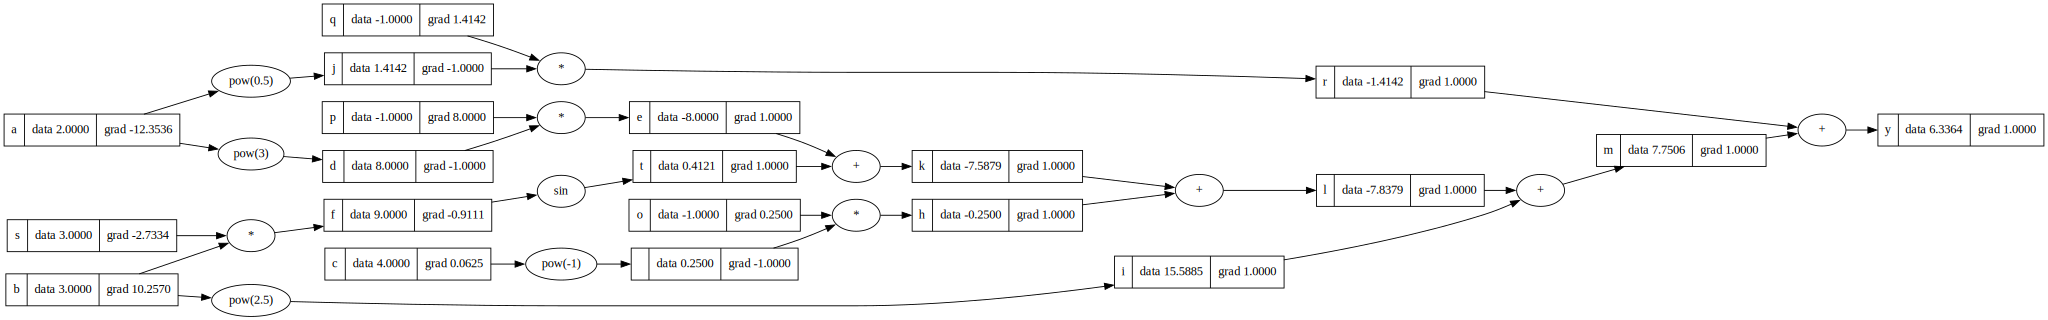

In [9]:
y.backward()
draw_dot(y)

In [10]:
ans = [-12.353553390593273, 10.25699027111255, 0.0625]
yours_from_diag = [-12.3536, 10.2570, 0.0625]
yours = [a.grad, b.grad, c.grad]
for dim in range(3):
    ok = 'OK' if abs(yours[dim] - ans[dim]) < 1e-5 else 'WRONG!'
    print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {yours[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353553390593273
OK for dim 1: expected 10.25699027111255, yours returns 10.25699027111255
OK for dim 2: expected 0.0625, yours returns 0.0625


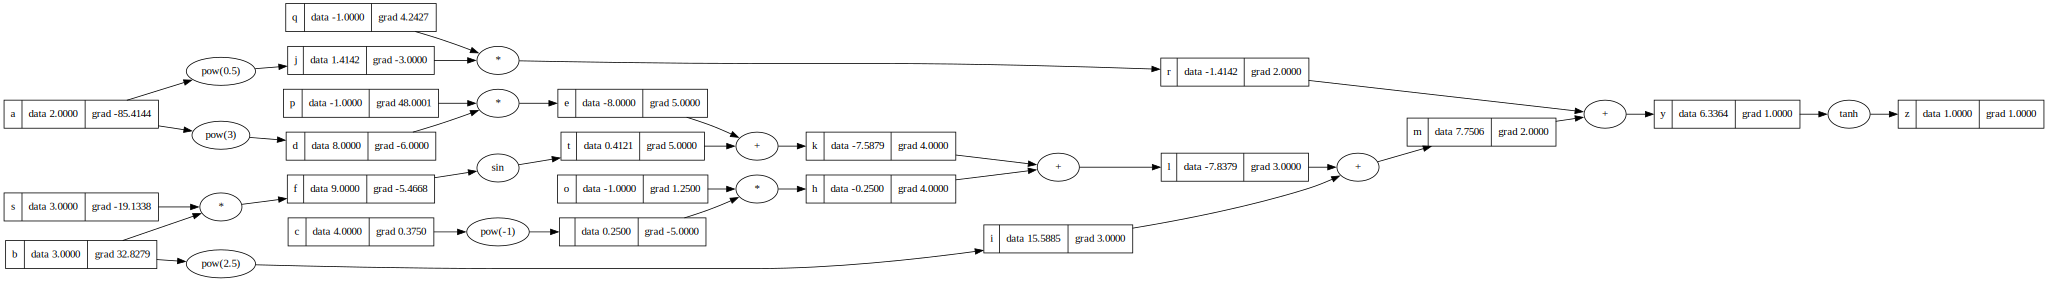

In [11]:

z = y.tanh()
z.label = 'z'
z.backward()
draw_dot(z)